In [141]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [144]:
data = pd.concat(pd.read_pickle(g) for g in [
    "../salomon/results/elementary.zip",
    "../salomon/results/irw.zip",
    "../salomon/results/pegasus.zip",
    "../salomon/results/rg.zip"
])
data["graph_set"] = data["graph_set"].apply(lambda i: os.path.basename(i))

In [147]:
grouped = data.drop(columns="execution_time")
grouped = grouped[grouped["imode"] == "exact"]
grouped = grouped.groupby(["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "imode", "min_sched_interval", "sched_time", "netmodel"])
netmodels = grouped["time"].mean().unstack().dropna().reset_index()
netmodels["ratio"] = netmodels["minmax"] / netmodels["simple"]

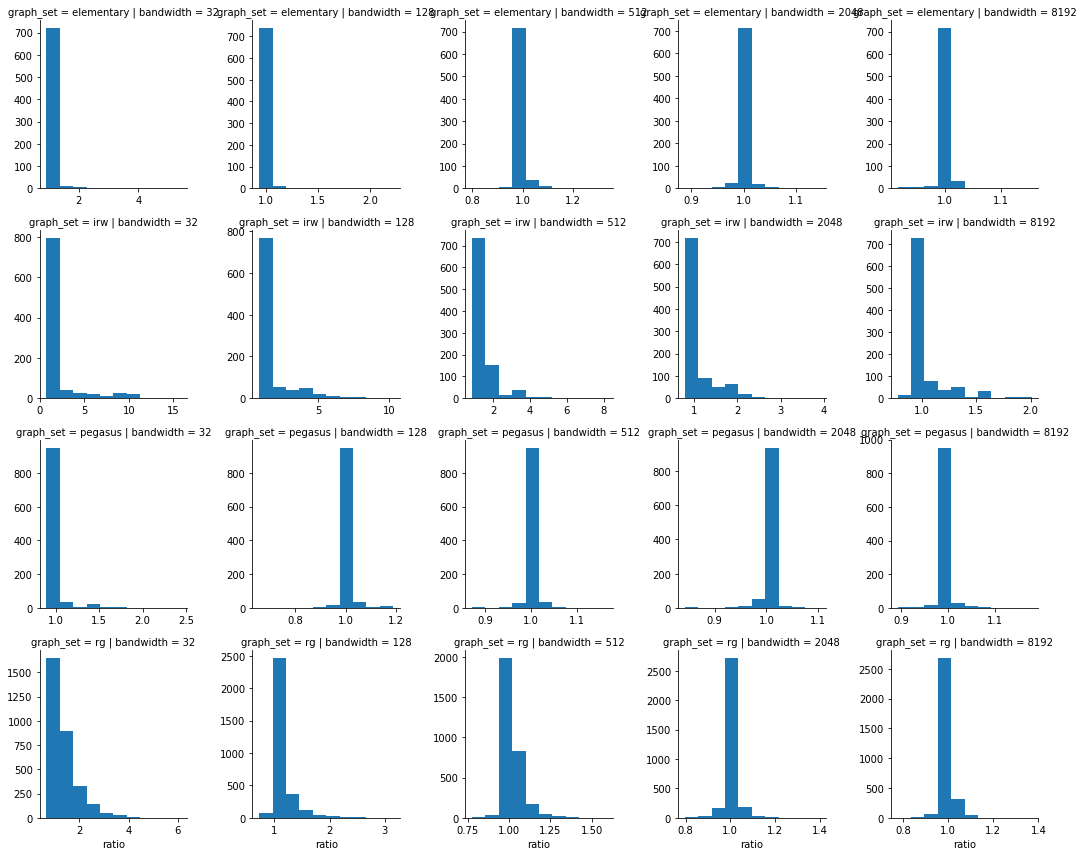

In [150]:
#netmodels.groupby("bandwidth").plot(y="ratio", kind="hist")
g = sns.FacetGrid(netmodels, col="bandwidth", row="graph_set", sharey=False, sharex=False)
g = g.map(plt.hist, "ratio")